<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/UAS/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn tensorflow torch torchvision torchaudio

In [2]:
# 📦 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [3]:
# 🔽 2. Upload File CSV
from google.colab import files
uploaded = files.upload()


Saving RegresiUTSTelkom.csv to RegresiUTSTelkom.csv


In [4]:
# 📥 3. Load Dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [5]:
# 🔍 4. Pembersihan Data
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Anggap target adalah kolom pertama dengan dtype integer
target_column = df.select_dtypes(include='int').columns[0]
print("Target Column:", target_column)

# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# Label Encoding dan One-Hot Encoding
for col in X.select_dtypes(include='object').columns:
    if X[col].nunique() <= 10:
        X = pd.get_dummies(X, columns=[col])
    else:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Target Column: 2001


In [6]:
# ✂️ 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# ⚙️ 6. Arsitektur MLP dengan TensorFlow
model_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)
])

model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=5, factor=0.5)

history = model_tf.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop, lr_reduce])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 2080362.3750 - val_loss: 372.8722 - learning_rate: 0.0010
Epoch 2/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 26734.9102 - val_loss: 243.2302 - learning_rate: 0.0010
Epoch 3/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 26640.6074 - val_loss: 270.3667 - learning_rate: 0.0010
Epoch 4/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 26373.6270 - val_loss: 242.3824 - learning_rate: 0.0010
Epoch 5/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - loss: 26277.1973 - val_loss: 398.6512 - learning_rate: 0.0010
Epoch 6/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 26031.6680 - val_loss: 154.7528 - learning_rate: 0.0010
Epoch 7/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 26087.7578 - val_loss: 421.1618 - learning_rate: 0.0010
Epoch 8/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 25906.8789 - val_loss: 189.7757 - learning_rate: 0.0010
Epoch 9/100
10307/1030

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
TF - RMSE: 12.483149042199473, MSE: 155.82901000976562, R2: -0.31293606758117676


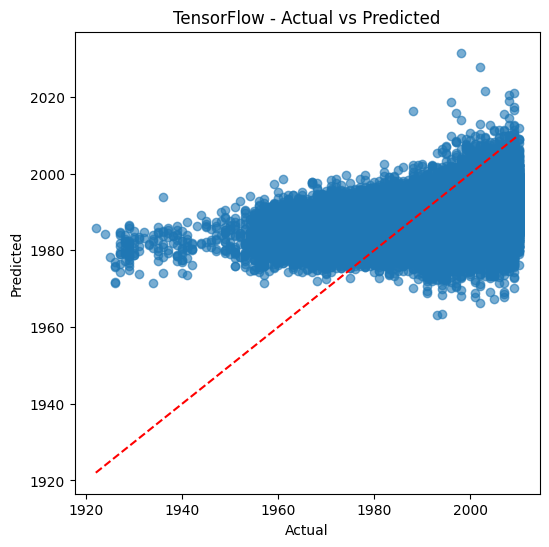

In [8]:
# 📊 7. Evaluasi TensorFlow
y_pred_tf = model_tf.predict(X_test).flatten()
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print(f"TF - RMSE: {rmse_tf}, MSE: {mse_tf}, R2: {r2_tf}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tf, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TensorFlow - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [9]:
# 🔥 8. Arsitektur MLP dengan PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

model_torch = MLP(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001, weight_decay=1e-5)


In [10]:
# 🔁 9. Training PyTorch Model
for epoch in range(100):
    model_torch.train()
    for xb, yb in train_loader:
        pred = model_torch(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 18122.1504
Epoch 20, Loss: 20648.4668
Epoch 30, Loss: 21784.6094
Epoch 40, Loss: 22294.1836
Epoch 50, Loss: 16575.0000
Epoch 60, Loss: 10278.7227
Epoch 70, Loss: 21151.3945
Epoch 80, Loss: 10800.4717
Epoch 90, Loss: 24881.3359
Epoch 100, Loss: 16351.2236


PyTorch - RMSE: 13.430602676605243, MSE: 180.38108825683594, R2: -0.5197993516921997


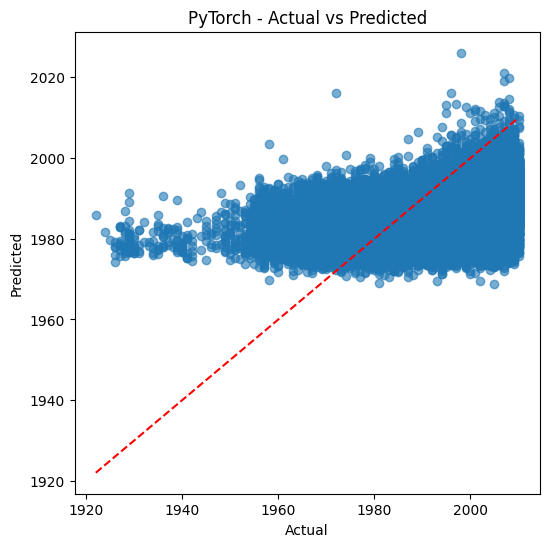

In [11]:
# 📊 10. Evaluasi PyTorch
model_torch.eval()
with torch.no_grad():
    y_pred_pt = model_torch(X_test_torch).numpy().flatten()

mse_pt = mean_squared_error(y_test, y_pred_pt)
rmse_pt = np.sqrt(mse_pt)
r2_pt = r2_score(y_test, y_pred_pt)

print(f"PyTorch - RMSE: {rmse_pt}, MSE: {mse_pt}, R2: {r2_pt}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_pt, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PyTorch - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


RMSE (Root Mean Squared Error):
Mengukur rata-rata deviasi prediksi dari nilai aktual. Semakin kecil semakin baik.

MSE (Mean Squared Error):
Sama seperti RMSE tapi tidak di-root. Lebih sensitif terhadap outlier.

R² (R-squared / Koefisien Determinasi):
Menjelaskan seberapa besar variabilitas target yang bisa dijelaskan oleh model.
Nilai ideal mendekati 1, dan nilai negatif berarti model lebih buruk dari regresi rata-rata.



 TensorFlow
Arsitektur: MLP dengan dropout, batch normalization, Adam optimizer, dan learning rate scheduler.

Hasil: RMSE 12.48, R² -0.31.

Kelebihan: Training cukup stabil dan generalisasi lebih baik dari PyTorch.

Kekurangan: Masih underfitting (akurasi buruk, R² negatif).

PyTorch
Arsitektur setara dengan TensorFlow (jumlah neuron, dropout, batchnorm).

Hasil: RMSE 13.43, R² -0.52.

Kekurangan: Akurasi lebih buruk dari TensorFlow, kemungkinan karena:

Proses training manual lebih sensitif

Tidak ada early stopping

 Kesimpulan Model Terbaik
Model TensorFlow lebih baik dibandingkan PyTorch berdasarkan:

RMSE lebih kecil (lebih akurat)

MSE lebih rendah

R² mendekati nol, walaupun masih negatif (lebih mendekati model yang benar)

